In [2]:
# Examples of Bagging and Feature randomness

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Single Decision Tree (no bagging, no feature randomness)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f"Single Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")

# 2. Random Forest with bagging, but no feature randomness
rf_bagging = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
rf_bagging.fit(X_train, y_train)
rf_bagging_pred = rf_bagging.predict(X_test)
print(f"Random Forest (with bagging, no feature randomness) Accuracy: {accuracy_score(y_test, rf_bagging_pred):.4f}")

# 3. Full Random Forest (with both bagging and feature randomness)
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train, y_train)
rf_full_pred = rf_full.predict(X_test)
print(f"Full Random Forest Accuracy: {accuracy_score(y_test, rf_full_pred):.4f}")

Single Decision Tree Accuracy: 0.9444
Random Forest (with bagging, no feature randomness) Accuracy: 0.9722
Full Random Forest Accuracy: 1.0000


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC for each class:
  Class 0: 1.0000
  Class 1: 1.0000
  Class 2: 1.0000

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


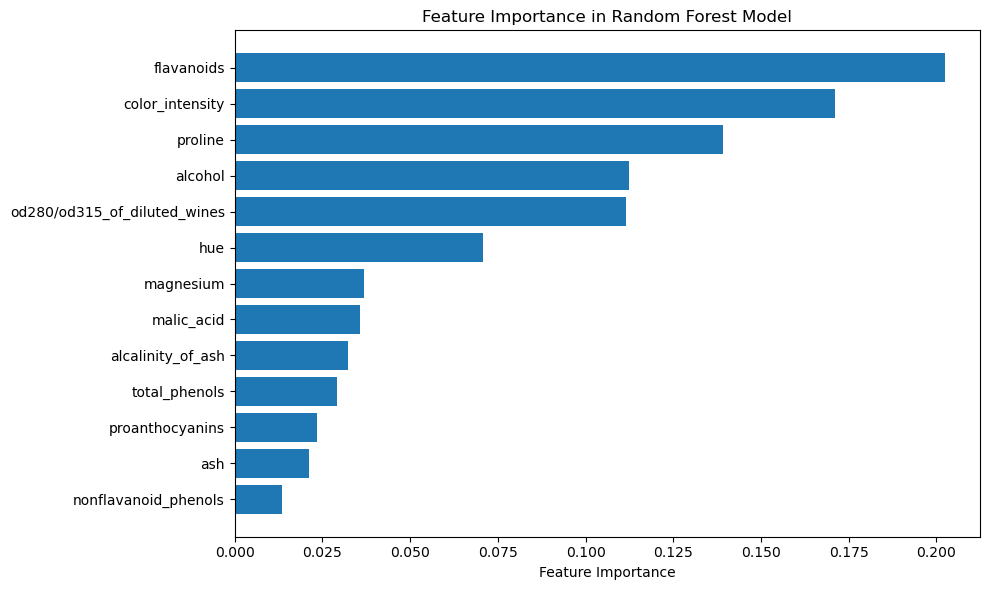


Feature Importance:
nonflavanoid_phenols: 0.0135
ash: 0.0213
proanthocyanins: 0.0236
total_phenols: 0.0293
alcalinity_of_ash: 0.0324
malic_acid: 0.0357
magnesium: 0.0368
hue: 0.0709
od280/od315_of_diluted_wines: 0.1116
alcohol: 0.1124
proline: 0.1390
color_intensity: 0.1712
flavanoids: 0.2023


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Scale the features
# Standardization is important for many machine learning algorithms. It puts all features on the same scale, which can improve the model's performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
# n_estimators=100 means we're using 100 trees in our forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# Get probability predictions for each class
y_pred_proba = rf_model.predict_proba(X_test)

# Calculate various evaluation metrics
# Accuracy: Overall correctness of the model
accuracy = accuracy_score(y_test, y_pred)

# Precision: Accuracy of positive predictions
# Recall: Ability to find all positive instances
# F1: Harmonic mean of precision and recall
# We use 'weighted' average because it's a multi-class problem
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix: Table showing correct and incorrect predictions by class
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate AUC-ROC for each class (one-vs-rest)
# AUC-ROC: Model's ability to distinguish between classes
auc_roc = []
for i in range(3):  # 3 classes in the wine dataset
    auc = roc_auc_score((y_test == i).astype(int), y_pred_proba[:, i])
    auc_roc.append(auc)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("AUC-ROC for each class:")
for i, auc in enumerate(auc_roc):
    print(f"  Class {i}: {auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Feature importance
# This shows how much each feature contributes to the model's decisions
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(wine.feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# Print feature importance
print("\nFeature Importance:")
for i in sorted_idx:
    print(f"{wine.feature_names[i]}: {feature_importance[i]:.4f}")
